In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
np.random.seed(42)

In [117]:
# This is an unknown function that we want to approximate using given dataset D
def f(x):
    return 2*x

Dataset $D = \{(x^{(i)}, t^{(i)}) \}_{i=1}^N$
- The function that needs to be approximated is: $$t^{(i)} \cong f(x^{(i)})$$

In [118]:
x = np.random.uniform(0, 1, 10)
x

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [119]:
t = f(x)
t

array([0.74908024, 1.90142861, 1.46398788, 1.19731697, 0.31203728,
       0.31198904, 0.11616722, 1.73235229, 1.20223002, 1.41614516])

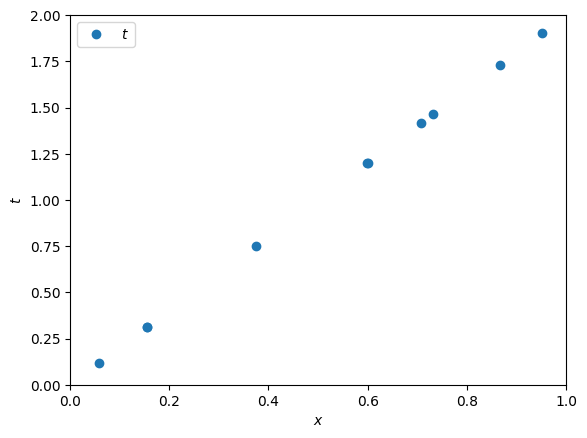

In [120]:
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1) # Limit the x-axis in (0, 1)
plt.ylim(0,2) # Limit the y-axis in (0, 2)
plt.legend()  # Display note
plt.show()

Objectives: Model will find a f function that can approximate the t values from x values

In [121]:
def model(w_0, x):
    return w_0 * x

x is given value in dataset $\to$ the goal is finding the best $w_{0}$

Calculate slope all data points are on the same line and there are no noises

In [122]:
w_0 =(t[1] - t[0])/ (x[1] - x[0])
w_0

np.float64(2.0)

---

## Assumption:
- epsilon represents noise belongs to Normal distribution 
- (In reality we won't know which distribution epsilon belongs to)

In [123]:
epsilon = np.random.normal(0, 0.3, size = x.shape[0])
epsilon

array([-0.14084232,  0.16276801, -0.13902531, -0.13971893,  0.07258868,
       -0.57398407, -0.51747535, -0.16868626, -0.30384934,  0.0942742 ])

In [124]:
t2 = f(x) + epsilon
t2

array([ 0.60823792,  2.06419663,  1.32496258,  1.05759804,  0.38462596,
       -0.26199503, -0.40130813,  1.56366603,  0.89838069,  1.51041936])

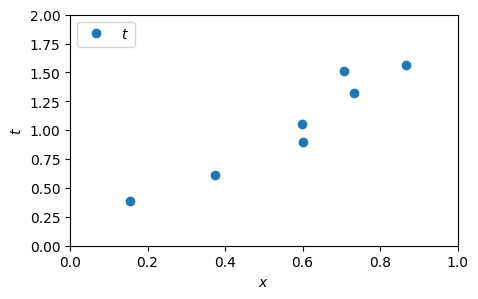

In [125]:
plt.figure(figsize=(5,3))
plt.plot(x, t2, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)
plt.legend()
plt.show()

The dataset doesn't have perfect linear relationship -> can't use slope

## Make some guess on w_0 values

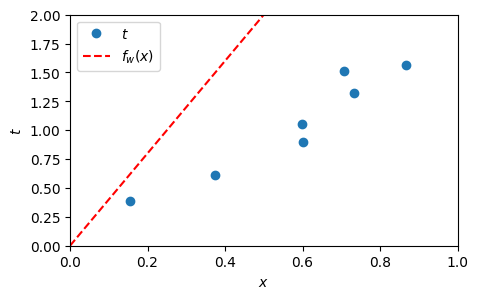

In [126]:
w_0 = 4.0
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t2, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)

# Plot our model
plt.plot([0, 1], [model(0, w_0), model(1, w_0)], 'r--', label='$f_w(x)$')

plt.legend()
plt.show()

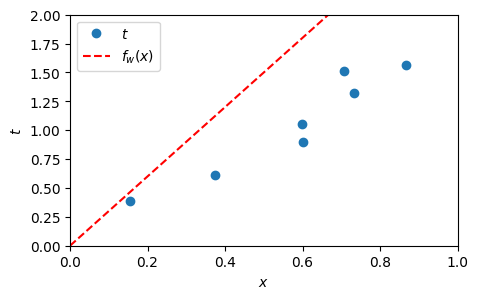

In [127]:
w_0 = 3.0
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t2, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)

# Plot our model
plt.plot([0, 1], [model(0, w_0), model(1, w_0)], 'r--', label='$f_w(x)$')

plt.legend()
plt.show()

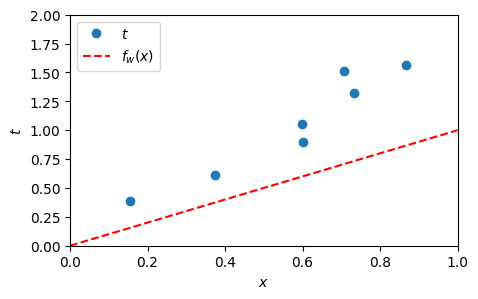

In [128]:
w_0 = 1.0
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t2, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)

# Plot our model
plt.plot([0, 1], [model(0, w_0), model(1, w_0)], 'r--', label='$f_w(x)$')

plt.legend()
plt.show()

---

\begin{equation}
L(w) = \frac{1}{N} \sum_{i=1}^N (t_i - w_{0}x^{(i)})^2 = \frac{1}{N}\sum_{i=1}^N L_i
\end{equation}

In [129]:
## Define a loss function MSE
def loss(predict, t): # t is ground truth in our example
    return np.mean((t - predict)**2)

For each value of w_0, we calculate its loss with respect to all target values.

In [130]:
# Define a range of w_s values to try
w_s = np.linspace(0, 4, 1000)  # Create 1000 evenly spaced values in the range [0, 4]
w_s[:5]

array([0.        , 0.004004  , 0.00800801, 0.01201201, 0.01601602])

In [135]:
predict = np.array([model(w_0, x) for w_0 in w_s])
losses = np.array([loss(pred, t2) for pred in predict])

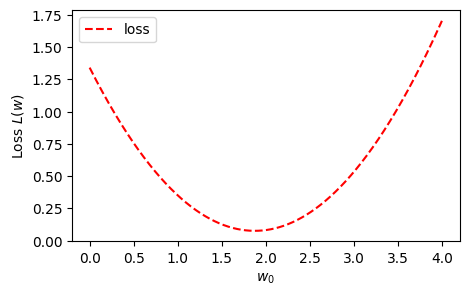

In [137]:
plt.figure(figsize=(5,3))
plt.plot(w_s, losses, 'r--', label='loss')
plt.xlabel('$w_0$')
plt.ylabel('Loss $L(w)$')
plt.legend()
plt.show()